In [1]:
from keras.applications import VGG16
conv_base = VGG16(
    weights='imagenet'
    include_top=False,
    input_shape=(150, 150, 3))

Using TensorFlow backend.
C:\Users\Asharib Shikare\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asharib Shikare\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asharib Shikare\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asharib Shikare\anaconda3\lib\site-packag

In [132]:

import requests 
path = "E:"

for i in range(2):
    url = "https://picsum.photos/200/200/?random"
    response = requests.get(url)
    if response.status_code == 200:
        file_name = 'not_cat_{}.jpg'.format(i)
        file_path = path + "/" + file_name
        with open(file_path, 'wb') as f:
            print("saving: " + file_name)
            f.write(response.content)

saving: not_cat_0.jpg
saving: not_cat_1.jpg


In [107]:
from keras import models
from keras import layers
model1 = models.Sequential()
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [108]:
conv_base.trainable = False

In [109]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255,
                                                          rotation_range=40,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          shear_range=0.2,
                                                          zoom_range=0.2,
                                                          horizontal_flip=True,
                                                          fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('E:/one/train/',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory('E:/one/validation/',
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [118]:


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 628s 6s/step - loss: 2.9891 - acc: 0.6590 - val_loss: 0.1693 - val_acc: 0.9020
Epoch 2/10
100/100 [==============================] - 651s 7s/step - loss: 0.2651 - acc: 0.8990 - val_loss: 0.2526 - val_acc: 0.9140
Epoch 3/10
100/100 [==============================] - 650s 6s/step - loss: 0.2027 - acc: 0.9295 - val_loss: 0.1056 - val_acc: 0.9400
Epoch 4/10
100/100 [==============================] - 642s 6s/step - loss: 0.1779 - acc: 0.9325 - val_loss: 0.1387 - val_acc: 0.9490
Epoch 5/10
100/100 [==============================] - 661s 7s/step - loss: 0.1591 - acc: 0.9390 - val_loss: 0.0508 - val_acc: 0.9460
Epoch 6/10
100/100 [==============================] - 660s 7s/step - loss: 0.1613 - acc: 0.9410 - val_loss: 0.1375 - val_acc: 0.9520
Epoch 7/10
100/100 [==============================] - 658s 7s/step - loss: 0.1424 - acc: 0.9485 - val_loss: 0.0696 - val_acc: 0.9570
Epoch 8/10
100/100 [==============================] - 488s 5s/step - 

In [135]:
model1.save('unary2.h5')

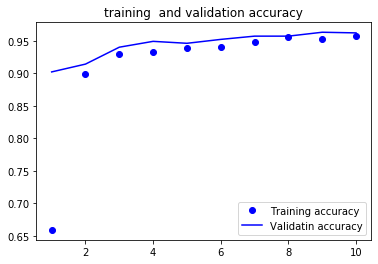

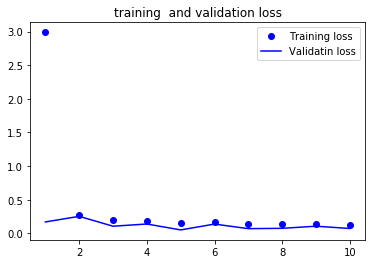

In [119]:
import matplotlib.pyplot as plt

acc=history.history['acc']
loss=history.history['loss']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validatin accuracy')
plt.title('training  and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validatin loss')
plt.title('training  and validation loss')
plt.legend()

plt.show()



In [133]:
from keras.preprocessing import image
import numpy as np 

test_image = image.load_img('E:/not_cat_0.jpg',
                            target_size = (150, 150))
#test_image.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image/=255
result = model.predict(test_image)
print(result[0][0])
if result >= 0.5:
    prediction = 'This is cat'
else:
    prediction = 'This is not a cat'

print(prediction)

0.0049008387
This is not a cat
